Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [66]:
NAME = "Rea Rustagi"
COLLABORATORS = ""

---

In [67]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  Numerical  Quadrature (hw4++)

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [68]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    
    h = b - a
    I = f(a) * h
    
    return I
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    
    h = b - a
    I = f(a + (h/2.)) * h
    
    return I
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    
    h = b - a
    I = (f(a) + f(b)) * (h/2.)
    
    return I
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""

    # 2 subintervals
    h = b - a
    dx = h / 2.
    x = numpy.linspace(a, b, 3)
    y = f(x)
    I = (dx/3) * numpy.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return I



In [69]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculates the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

To find the roots of $P_3(x)$, we will first set it equal to 0:
$$
\frac{5x^3 - 3x}{2} = 0
\newline 5x^3 - 3x = 0 \rightarrow x = 0 \text{ is a root}
\newline 5x^3 = 3x
\newline x^2 = \frac{3}{5}
\newline x = \pm \sqrt{\frac{3}{5}}
$$
Thus, the roots are:
$$
x_{0,1,2} = 0, \sqrt{\frac{3}{5}}, -\sqrt{\frac{3}{5}}
$$
Next, we will find the weights, $w_i$:
$\newline$ Assume: 
$$
    I_3[f] = w_0 f(x_0) + w_1 f(x_1) + w_2 f(x_2)
$$
$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{1}_{-1} 1 dx = 2 & & I_2[1] &= w_0 + w_1 + w_2\\
    &\text{if}~f = x:  &I[f] =  \int^{1}_{-1} x dx = 0 & & I_2[x] &= w_0 x_0 + w_1 x_1 + w_2 x_2\\
    &\text{if}~f = x^2:  &I[f] =  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & I_2[x^2] &= w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2\\
\end{aligned}$$

$$\begin{aligned}
    &w_0 + w_1 + w_2 = 2\\
    &w_0 x_0 + w_1 x_1 + w_2 x_2 = 0\\
    &w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3}\\
\end{aligned}$$

From solving the system of equations we find that:
$$
x_0 = 0, w_0 = \frac{8}{9}
\newline x_1 = \sqrt{\frac{3}{5}}, w_1 = \frac{5}{9}
\newline x_2 = -\sqrt{\frac{3}{5}}, w_2 = \frac{5}{9}
$$

Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [70]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule"""
    
    h = b - a
    wi = numpy.array([8./9., 5./9., 5./9.])
    rts = numpy.array([0., numpy.sqrt(3./5.), -numpy.sqrt(3./5.)])
    x = lambda rts: h / 2. * rts + (b + a) / 2.
    I = h / 2. * numpy.sum(wi * f(x(rts)))
    
    return I

In [71]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [72]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    
    I_N = 0
    p = numpy.linspace(a, b, N + 1)
    for n in range(N):
        I_N += method(f, p[n], p[n + 1])
    
    return I_N

In [73]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).

This function should  make a beautiful log-log plot showing the convergence behavior of the *relative error* with respect to 

$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$

for all the different quadrature rules for 

$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

remember to label all the curves with the methods.

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


**Extra Credit** the rate of convergence of any scheme can be written as

$$
    |e| = C\Delta x^p
$$

For each method calculate $C$ and $p$ and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend). 

In [74]:
import matplotlib.cm as cm
from cycler import cycler

def plot_quad_convergence(f, a, b, N, I_true, title = None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    h = (b - a) / numpy.array(N)
    error = numpy.zeros(h.shape)
    
    fig = plt.figure(figsize = (7, 5))
    axes = fig.add_subplot(1, 1, 1)
    
    colors = plt.cm.plasma(numpy.linspace(0,1,6))
    plt.gca().set_prop_cycle(cycler('color', colors))
    
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    
    for m, meth in enumerate(methods):
        name = meth.__name__
        
        for i, n in enumerate(N):
            I = quadN(f, 0., x, n, method = meth)
            error[i] = numpy.abs((I - I_true) / I_true)
            
            max_n = len(N)
            
        p = numpy.polyfit(numpy.log(h[:max_n]), numpy.log(error[:max_n]), 1)
        fit_error = numpy.exp(p[1]) * (h ** p[0])
        
        axes.loglog(h, error, '*', label = '{}, p = {:.2f}'.format(name, p[0]), color = colors[m])
        axes.loglog(h, fit_error, '--', color = colors[m])
        
    axes.set_xlabel('$\Delta x$')
    axes.set_ylabel('Relative Error')
    axes.legend()
    axes.grid()
    axes.set_title(title)
    
    plt.show()

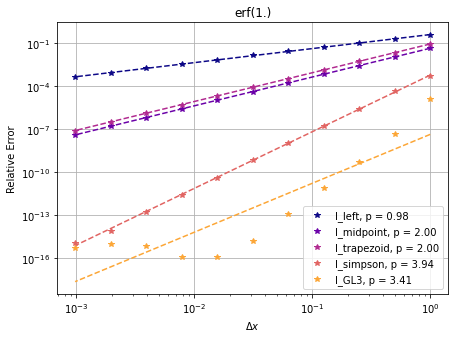

In [75]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of function evaluations required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


Mid-point scheme: From the graph, I am estimating that $e \approx 10^{-7}$ is reached at $\Delta x \approx 10^{-2.9}$, which is about 800-900 function evaluations.
$\newline$ Simpson's scheme: From the graph, I am estimating that $e \approx 10^{-7}$ is reached at $\Delta x \approx 10^{-0.95}$, which is about 8-10 function evaluations.
$\newline$ 3-Point GL scheme: From the graph, I am estimating that $e \approx 10^{-7}$ is reached at $\Delta x \approx 10^{-0.3}$, which is about 2-3 function evaluations.

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

I imagine that the problematic points will be at $ x = 0 $, where the integrals are discontinuous.

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [76]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

<ipython-input-77-48a01792b322>:1: RuntimeWarning: divide by zero encountered in double_scalars
  I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
<ipython-input-77-48a01792b322>:1: RuntimeWarning: divide by zero encountered in double_scalars
  I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
<ipython-input-77-48a01792b322>:1: RuntimeWarning: divide by zero encountered in true_divide
  I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)


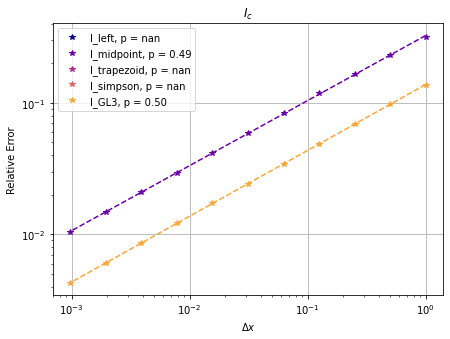

<ipython-input-77-48a01792b322>:2: RuntimeWarning: invalid value encountered in double_scalars
  I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)
<ipython-input-77-48a01792b322>:2: RuntimeWarning: invalid value encountered in double_scalars
  I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)
<ipython-input-77-48a01792b322>:2: RuntimeWarning: invalid value encountered in true_divide
  I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)


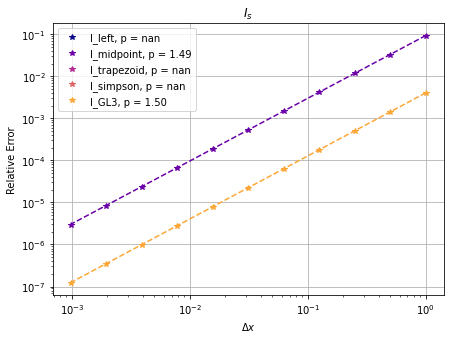

In [77]:
I_c = lambda x: numpy.cos(x)/numpy.sqrt(x)
I_s = lambda x: numpy.sin(x)/numpy.sqrt(x)

N = [2**n for n in range (11)]
plot_quad_convergence(I_c, 0., 1., N, Ic_true, '$I_c$')
plot_quad_convergence(I_s, 0., 1., N, Is_true, '$I_s$')

**(c)**  [4] Explain the results of your plots

Of the methods we defined, only the midpoint and 3-point GL methods are able to approximate the Fresnel integrals. These two methods use the midpoint of each panel to calculate an approximation, so they do not encounter a divide by 0 error at the singularity $ x = 0 $. These two methods approximate $I_c$ better than $I_s$. 

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx$$

Transforming with $x = t^2$:

$$I_c = \int^1_0 \frac{\cos t^2}{\sqrt{t^2}} dt^2 = \int^1_0 \frac{\cos t^2}{t} dt^2$$

Since $dt^2 = 2tdt$, 

$$I_c = 2 \int^1_0 \cos t^2 dt$$

Using the same substitutions:
$$I_s = 2 \int^1_0 \sin t^2 dt$$

<ipython-input-74-897c5fe506c3>:51: RuntimeWarning: divide by zero encountered in log
  p = numpy.polyfit(numpy.log(h[:max_n]), numpy.log(error[:max_n]), 1)


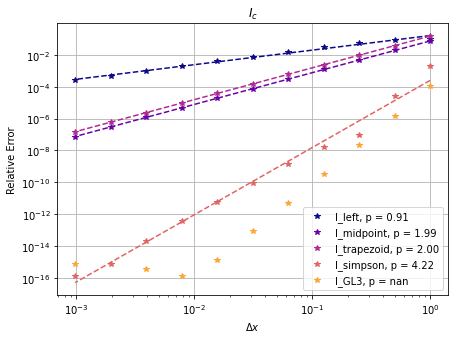

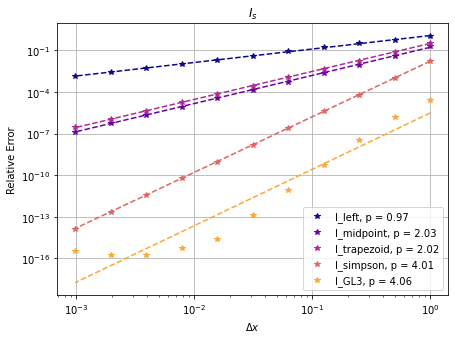

In [78]:
# Setting the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

I_c = lambda t: 2 * numpy.cos(t ** 2)
I_s = lambda t: 2 * numpy.sin(t ** 2)

N = [2**n for n in range (11)]
plot_quad_convergence(I_c, 0., 1., N, Ic_true, '$I_c$')
plot_quad_convergence(I_s, 0., 1., N, Is_true, '$I_s$')

Now, all five methods can approximate the Fresnel integrals because the singularity at $ x = 0 $ has been eliminated with the transformation. In both graphs, we can see that the 3-point GL scheme works best. $I_c$ is still better approximated. 